In [ ]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier

import os
import pickle

In [2]:
raw_data = pd.read_csv('/content/drive/MyDrive/hacks-ai/spb/data/processed_train.csv')

In [39]:
X = raw_data

In [3]:
y = np.load('/content/drive/MyDrive/hacks-ai/spb/data/target.npy')

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [6]:
model = CatBoostClassifier(task_type='GPU')

In [7]:
model.fit(X_train, y_train, eval_set=(X_valid, y_valid), silent=True)


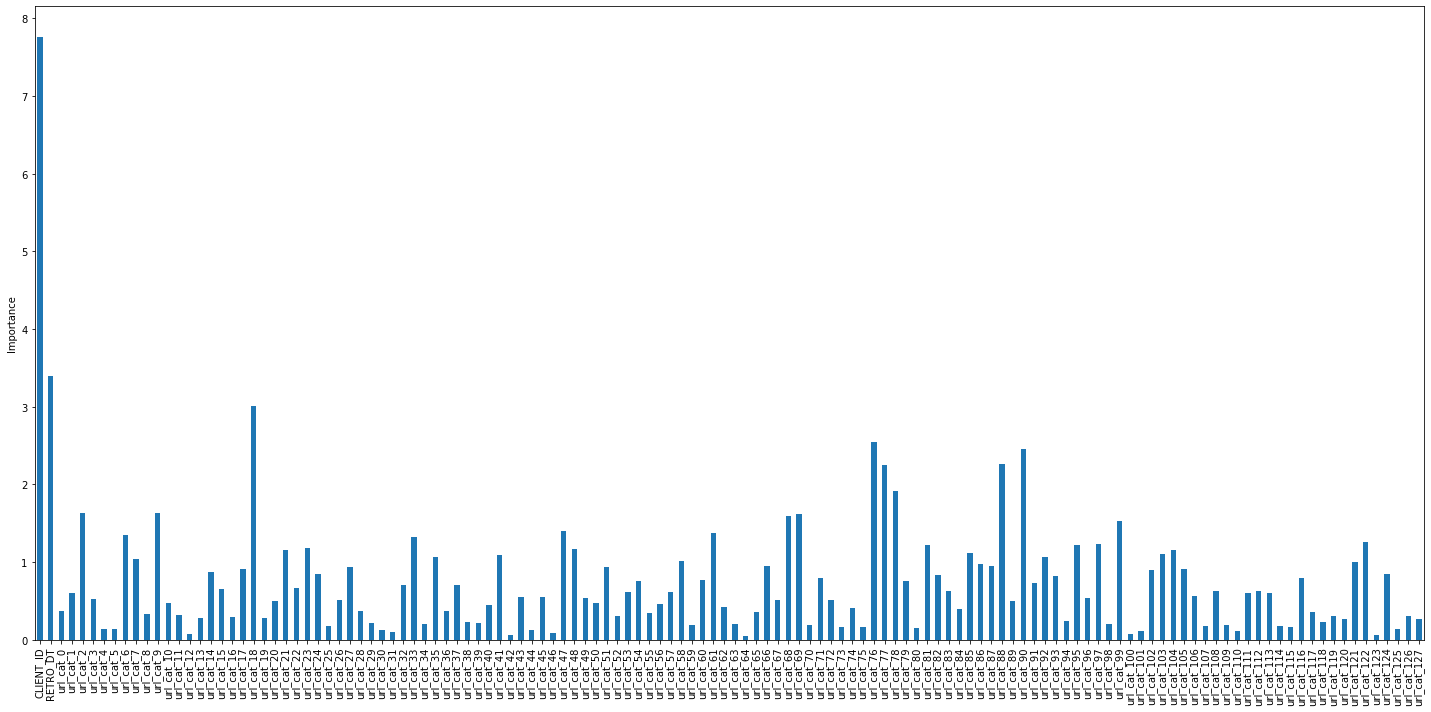

In [8]:
features_importances = pd.Series(model.get_feature_importance(), index=X.columns)

fig, ax = plt.subplots(figsize=(20, 10))
features_importances.plot.bar(ax=ax)
ax.set_ylabel("Importance")
fig.tight_layout()

In [ ]:
dropped_cols = X.columns[np.where(features_importances < 1.5)]
print(dropped_cols.values)

In [41]:
X = X.drop(columns=dropped_cols)
X = X.drop(columns=['CLIENT_ID'])
X = X.drop(columns=['RETRO_DT'])

In [44]:
for col in X.columns.values:
    scaler = preprocessing.StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))[:, 0]

In [45]:
X.describe()

,url_cat_2,url_cat_9,url_cat_18,url_cat_68,url_cat_69,url_cat_76,url_cat_77,url_cat_78,url_cat_88,url_cat_90,url_cat_99
count,3.037770e+05,3.037770e+05,3.037770e+05,3.037770e+05,3.037770e+05,3.037770e+05,3.037770e+05,3.037770e+05,3.037770e+05,3.037770e+05,3.037770e+05
mean,6.543429e-18,-8.455584e-18,-2.045479e-17,-1.929698e-19,-6.882588e-18,-1.548436e-17,1.155480e-17,4.830092e-18,2.391656e-18,3.762910e-18,-3.508541e-18
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.608439e-01,-1.452110e-01,-1.343164e-01,-2.132769e-01,-2.849137e-01,-2.118246e-01,-3.577659e-01,-1.236673e-01,-1.283307e-01,-1.382583e-01,-2.505333e-01
25%,-1.608439e-01,-1.452110e-01,-1.343164e-01,-2.132769e-01,-2.849137e-01,-2.118246e-01,-3.577659e-01,-1.236673e-01,-1.283307e-01,-1.382583e-01,-1.793162e-01
50%,-1.608439e-01,-1.452110e-01,-1.343164e-01,-1.920933e-01,-1.879036e-01,-7.156381e-02,-3.421768e-01,-1.236673e-01,-1.283307e-01,-1.026937e-01,-1.793162e-01
75%,-1.608439e-01,8.980981e-02,-2.949399e-02,-1.497259e-01,-9.089340e-02,6.869697e-02,-1.239293e-01,3.302756e-02,-6.723715e-03,-6.712909e-02,-1.080990e-01
max,1.775173e+02,2.804696e+02,1.586717e+02,7.039192e+01,1.132170e+02,2.825539e+02,5.395470e+01,3.961575e+02,1.207490e+02,1.103965e+02,9.945344e+01


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

model = CatBoostClassifier(task_type='GPU', iterations=10000, learning_rate=0.1, early_stopping_rounds=1000, l2_leaf_reg=1, depth=1)
model.fit(X_train, y_train, eval_set=(X_valid, y_valid))


In [59]:
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)

print(f"Train score: {metrics.roc_auc_score(y_train, y_pred_train)}, validation score {metrics.roc_auc_score(y_valid, y_pred_valid)}.")

Train score: 0.5000548200880963, validation score 0.5.
